<a href="https://colab.research.google.com/github/kanjamwingirwa/hypothyoidismPreiction/blob/main/Farnadis_Kanja_Hypothyroidism_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **Defining the Metric for Sucess**

A model of at least 80% accuracy. Compare the different models 

# **Understanding the Context**

There are many factors that predispose one to hypothyroidism. This analysis will build a model on whether one is diagnosed with hypothyrooism gicen the various factors 

# **Recording the Experimental Design**
1. Data cleaning and preparation

2. Exploratory Data Analysis

3. Modelling: Decision trees and Support Vector Machines
4. Conclusions

# **Data Preparation and Cleaning**

In [1]:
#we begin by importing the general libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load and preview the dataset
hypothyroid = pd.read_csv('hypothyroid.csv')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#look at the tail as well
hypothyroid.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
#look at the shape of the data to know the number of rows and columns
hypothyroid.shape
#we have 26 columns and 3163 rows in our dataset

(3163, 26)

In [5]:
#check out the info of the data sets
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#check for any null values in the data set
hypothyroid.isna().sum()
#this insinuates that the data does not have null values and yet we can see some ?

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
#let's check for unique values
for col in hypothyroid:
  print(hypothyroid[col].unique())

['hypothyroid' 'negative']
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['M' 'F' '?']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['y' 'n']
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '1

Looking at the above output there are several question marks in the data set. These will have to be dealt with accordingly.

In [91]:
#replace '?' with Nan in order to fillna
ht_df = hypothyroid.replace('?',np.NaN)
ht_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [92]:
#let's check for unique values again
for col in ht_df:
  print(ht_df[col].unique())

['hypothyroid' 'negative']
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['M' 'F' nan]
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['y' 'n']
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' nan '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '1

In [93]:
#first we have to change the columns into either numerical or categorical in order to fill the nan values
cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
ht_df[cols]= ht_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [94]:
#we then identify categorical variables and identify them as such
cols2= ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
ht_df[cols2]= ht_df[cols2].astype('category')

In [95]:
#check out the info of the data sets to see if the change has been implemented
ht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   object  
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   object  
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [96]:
#let's check again for null values
ht_df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [101]:
#let's drop the TBG column since it has too many NaN vaues
ht_df= ht_df.drop(['TBG'], axis=1)
ht_df.head(5)

KeyError: ignored

In [102]:
ht_df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n


In [104]:
#depending on the column, let's replace the nan values
hypo_df = ht_df['age'].fillna(ht_df['age'].mean(), inplace=True)

In [149]:
hypo_df['age'].unique()

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

In [106]:
hypo_df= ht_df['sex'].fillna(ht_df['sex'].mode(), inplace=True)

In [108]:
ht_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [110]:
ht_df['sex'].unique()

['M', 'F', NaN]
Categories (2, object): ['M', 'F']

In [124]:
hypo_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [128]:
hypo_df['sex'].fillna(hypo_df['sex'].mode()[0], inplace = True)

In [152]:
hypo_df['sex'].unique()

array([1, 0])

In [153]:
#others = ['TSH','T3', 'TT4','T4U', 'FTI']
hypo_df['TSH'].fillna((0), inplace=True)

In [154]:
hypo_df['T3'].fillna((0), inplace=True)

In [155]:
hypo_df['TT4'].fillna((0), inplace=True)

In [156]:
hypo_df['T4U'].fillna((0), inplace=True)

In [157]:
hypo_df['FTI'].fillna((0), inplace=True)

In [29]:
hypo_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [31]:
#check for duplicates
hypo_df.duplicated().sum()

152

In [32]:
#let's drop the duplicates
hypo_df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n


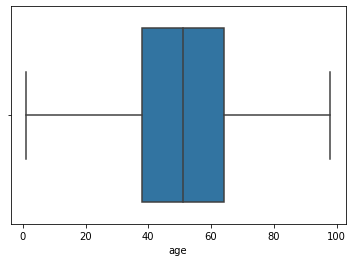

In [33]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='age')

The ages were btn 38 and 63 with no outliers. 

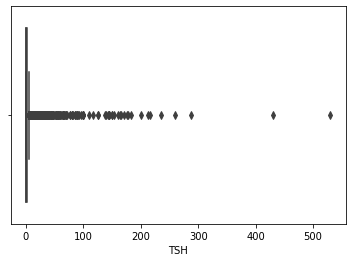

In [36]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='TSH')

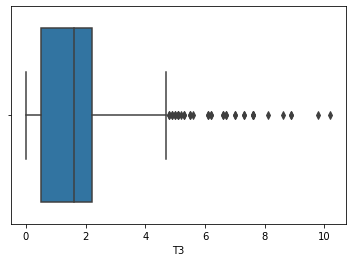

In [37]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='T3')

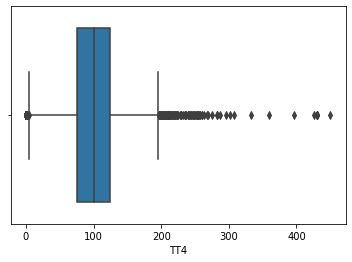

In [38]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='TT4')

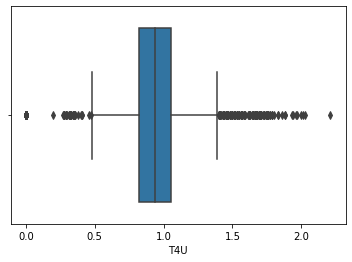

In [39]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='T4U')

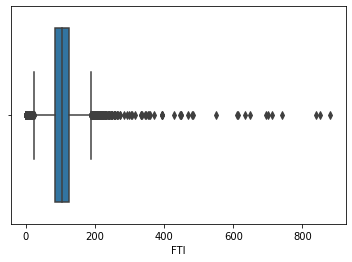

In [40]:
#Let's check for outliers
sns.boxplot(data=hypo_df, x='FTI')

For each of the above, there were some extreme values which instead of being dropped with be investigated. A quick google search reveals that T3,T4,TSH,FTI and TFU are some of the indications that show whether one has hypothyroidism or not. it would be incorrect to drop the extreme values since these very values are the ones that will bring out who has hypothyroidim

In [41]:
#get an overview of descriptive data analysis
hypo_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,5.046782,1.513531,100.281031,0.901502,106.386310
std,17.881969,22.160083,1.191836,52.588757,0.341286,65.607474
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,76.000000,0.820000,85.000000
50%,51.154214,0.400000,1.600000,100.000000,0.940000,105.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


# **Exploratory Data Analysis**

**Univariate Analysis**

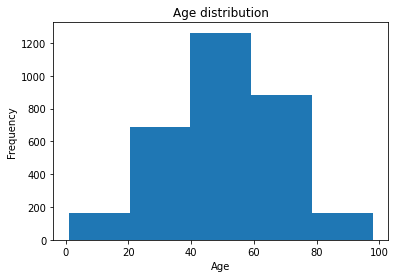

In [65]:
#lets look at the age distribution
hypo_df['age'].plot(kind='hist', bins = 5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()
#it seems most people test were between the ages of 40 and 60
#the distribution looks normal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


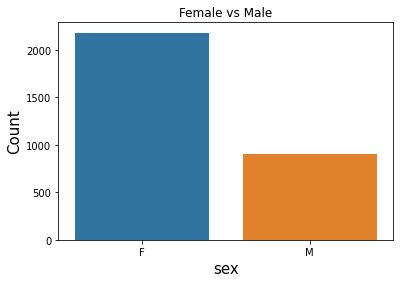

In [48]:
sns.countplot('sex', data = hypo_df)
plt.xlabel('sex', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Female vs Male')
plt.show()
#more females than males were tested

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


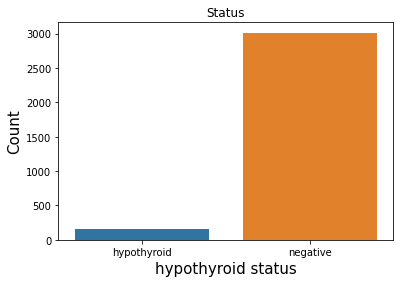

In [58]:
sns.countplot('status', data = hypo_df)
plt.xlabel('hypothyroid status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Status')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


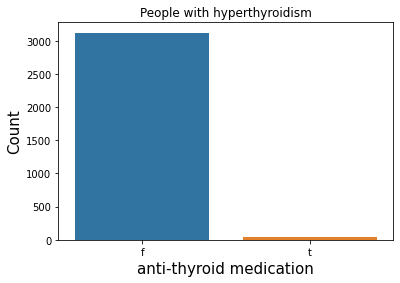

In [52]:
sns.countplot('on_antithyroid_medication', data = hypo_df)
plt.xlabel('anti-thyroid medication', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('People with hyperthyroidism')
plt.show()
#only a small percentage was on anti-thyroid medication. these were the people with hyperthyroidism

on_thyroxine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


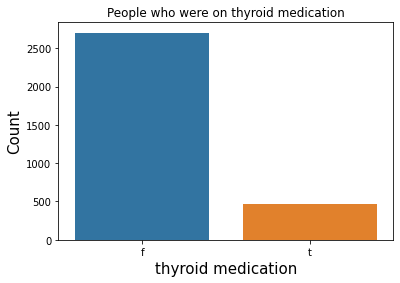

In [50]:
sns.countplot('on_thyroxine', data = hypo_df)
plt.xlabel('thyroxine medication', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('People with hypothyroidism')
plt.show()
#more people had hypothyroidism than hyperthyroidism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


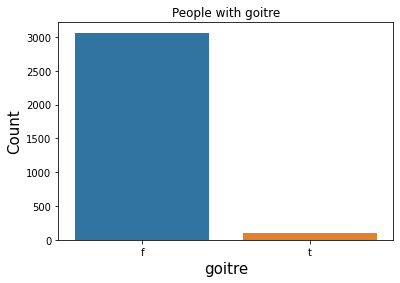

In [54]:
sns.countplot('goitre', data = hypo_df)
plt.xlabel('goitre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('People with goitre')
plt.show()
#this could indicate a relationship between goitre and thyroidism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


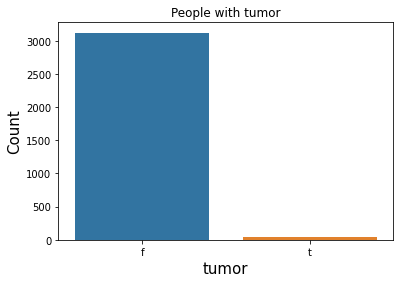

In [56]:
sns.countplot('tumor', data = hypo_df)
plt.xlabel('tumor', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('People with tumor')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


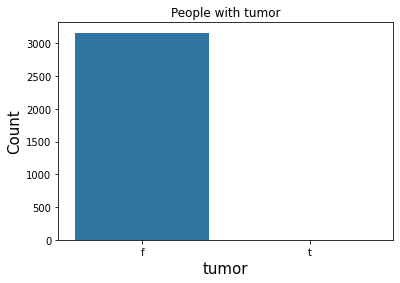

In [66]:
sns.countplot('lithium', data = hypo_df)
plt.xlabel('tumor', fontsize=15)
plt.ylabel('Lithium', fontsize=15)
plt.title('People with lithium')
plt.show()

**Bivariate Analysis**

In [67]:
#let's check or multicollinearity
corr = hypo_df.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011725,-0.079260,-0.005226,-0.028418,0.072473
TSH,0.011725,1.000000,-0.085072,-0.220293,0.095537,-0.186038
T3,-0.079260,-0.085072,1.000000,0.502813,0.457418,0.336268
TT4,-0.005226,-0.220293,0.502813,1.000000,0.599128,0.763978
T4U,-0.028418,0.095537,0.457418,0.599128,1.000000,0.204452
FTI,0.072473,-0.186038,0.336268,0.763978,0.204452,1.000000


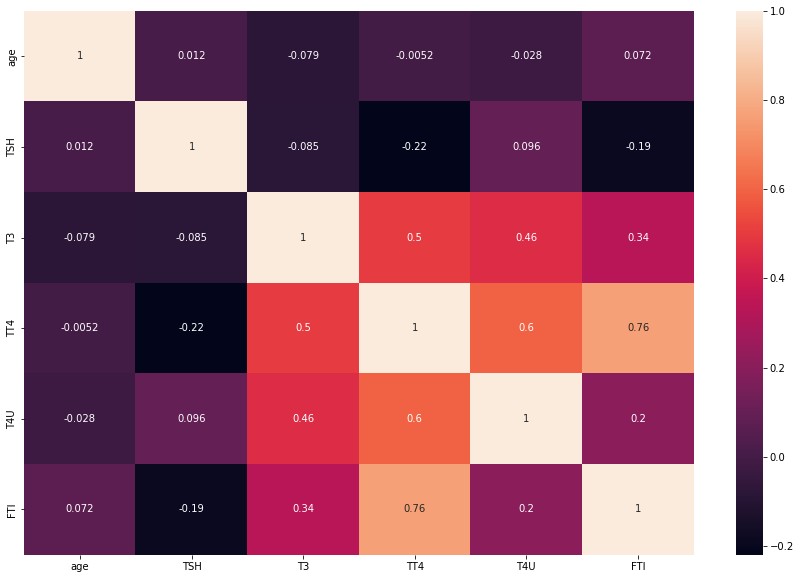

In [68]:
#use a heatmap to viasualize the above correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

There is a high collinearity between FTI and TT4. The rest of the variables have very little collinerarity with some even exhibiting negatives. 

In [132]:
hypo_df['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

# **Modelling**

# Decision Trees

In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
categ= ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
le = LabelEncoder()
hypo_df[categ] = hypo_df[categ].apply(le.fit_transform)

In [143]:
hypo_df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0


In [144]:
hypo_df['status'] = le.fit_transform(hypo_df['status'])

In [145]:
hypo_df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0


In [159]:
#let's split the data sets
from sklearn.model_selection import train_test_split
x = hypo_df.drop('status', axis=1)
y = hypo_df['status']
#scale the data
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

In [163]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5,max_depth=5)
forest=forest.fit(x_train, y_train)

In [164]:
#prediction
y_pred = forest.predict(x_test)

In [169]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print('accuracy_score:' , accuracy_score (y_test,y_pred))

R2 score : 0.55
accuracy_score: 0.982086406743941


The accuracy stands at 98% which is not bad. R2 score off 55 shows that more than half the variables have a role to play in the predictor variable

In [173]:
from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_test,y_pred))
print('root mean squared error is', np.sqrt(mean_squared_error(y_test,y_pred)))

mean squared error is 0.01791359325605901
root mean squared error is 0.1338416723448232


In [184]:
#let's visualize 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(x_test)
tree = forest.estimators_[60]
dot_data = StringIO()
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG','sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery' 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features, class_names=['Positive', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroidism.png')
Image(graph.create_png())

ValueError: ignored

Support Vector Machines

In [186]:
#let's begin with kernel= polynomial 
from sklearn.svm import SVC
#build the model 
polyclassifier = SVC(kernel = 'poly', degree = 15, gamma = 'auto')
polyclassifier.fit(x_train, y_train)
poly_pred = polyclassifier.predict(x_test)
accuracy_score(y_test, poly_pred)

0.9631190727081138

In [188]:
#kernel=linear
from sklearn.svm import SVC
#build the model 
polyclassifier1 = SVC(kernel = 'linear', degree = 15, gamma = 'auto')
polyclassifier1.fit(x_train, y_train)
poly_pred1 = polyclassifier1.predict(x_test)
accuracy_score(y_test, poly_pred1)

0.9757639620653319

In [189]:
#kernel=rbf
from sklearn.svm import SVC
#build the model 
polyclassifier2 = SVC(kernel = 'rbf', degree = 15, gamma = 'auto')
polyclassifier2.fit(x_train, y_train)
poly_pred2 = polyclassifier2.predict(x_test)
accuracy_score(y_test, poly_pred2)

0.9768177028451

Follow up questions
Did we have the right data?yes. the data is adequate to answer the questions

Conclusions: All the models were pretty accurate. 